# Preparing Image Data For Modeling

This notebook will turn the images into their respective matrix and save the csv so our modeling notebooks can train on them

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import re
import ast

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv('E:\\GitHub Repos\\Rape-kit-sperm-analysis\\Data\\Train_test\\Counts_BB.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Counts_BB.csv')
df

,Unnamed: 0,frame_name,sperm_count,cluster_count,small_or_pinhead_count,folder,fid,class,bb0,bb1,bb2,bb3
0,0,14_frame_0,3,0,0,14,ckyw6zzlj001r3867thf0fuy7,0,0.208594,0.825000,0.035937,0.037500
1,1,14_frame_0,3,0,0,14,ckyw704kw001v3867kvyjtx6k,0,0.796094,0.797917,0.029687,0.037500
2,2,14_frame_0,3,0,0,14,ckyw708pn001z386779fr849h,0,0.827344,0.123958,0.035937,0.039583
3,3,14_frame_1,3,0,0,14,ckyw6zzlj001r3867thf0fuy7,0,0.208594,0.814583,0.035937,0.037500
4,4,14_frame_1,3,0,0,14,ckyw704kw001v3867kvyjtx6k,0,0.764062,0.781250,0.029687,0.037500
...,...,...,...,...,...,...,...,...,...,...,...,...
19836,19836,52_frame_427,6,0,2,52,cl1x89ze6000o3f6baic4zklo,0,0.464062,0.462500,0.037500,0.054167
19837,19837,52_frame_427,6,0,2,52,cl1x8a7j3000s3f6bvn1rm1tw,0,0.416406,0.400000,0.029687,0.045833
19838,19838,52_frame_427,6,0,2,52,cl1x8ih7n00103f6b67egfbw2,0,0.057031,0.803125,0.032813,0.043750
19839,19839,52_frame_427,6,0,2,52,cl52g254u000o3b6gcyhoi1fk,2,0.132031,0.112500,0.026562,0.037500


In [4]:
image_dir = '/content/drive/MyDrive/Colab Notebooks/Train_test'

# Function to load, resize, vectorize, and normalize images
def vectorize_and_normalize_image(image_name, target_size=(128, 128)):
    # Load the image from the directory
    image_path = os.path.join(image_dir, f"{image_name}.jpg")

    # Read the image using OpenCV (in grayscale or color)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Use cv2.IMREAD_COLOR if you need color images

    # Check if the image was successfully loaded
    if img is not None:
        # Resize the image to a target size (reduce memory consumption)
        img_resized = cv2.resize(img, target_size)

        # Normalize the image (scaling pixel values to range 0-1)
        img_normalized = img_resized / 255.0

        return img_normalized
    else:
        print(f"Warning: Unable to load image {image_name}.jpg")
        return None

# Create a new column 'images' with normalized and resized image data (no flattening)
df['images'] = df['frame_name'].apply(lambda x: vectorize_and_normalize_image(x))

# Check the updated DataFrame
df.head()


,Unnamed: 0,frame_name,sperm_count,cluster_count,small_or_pinhead_count,folder,fid,class,bb0,bb1,bb2,bb3,images
0,0,14_frame_0,3,0,0,14,ckyw6zzlj001r3867thf0fuy7,0,0.208594,0.825000,0.035937,0.037500,"[[0.3843137254901961, 0.37254901960784315, 0.3..."
1,1,14_frame_0,3,0,0,14,ckyw704kw001v3867kvyjtx6k,0,0.796094,0.797917,0.029687,0.037500,"[[0.3843137254901961, 0.37254901960784315, 0.3..."
2,2,14_frame_0,3,0,0,14,ckyw708pn001z386779fr849h,0,0.827344,0.123958,0.035937,0.039583,"[[0.3843137254901961, 0.37254901960784315, 0.3..."
3,3,14_frame_1,3,0,0,14,ckyw6zzlj001r3867thf0fuy7,0,0.208594,0.814583,0.035937,0.037500,"[[0.3843137254901961, 0.37254901960784315, 0.3..."
4,4,14_frame_1,3,0,0,14,ckyw704kw001v3867kvyjtx6k,0,0.764062,0.781250,0.029687,0.037500,"[[0.3843137254901961, 0.37254901960784315, 0.3..."


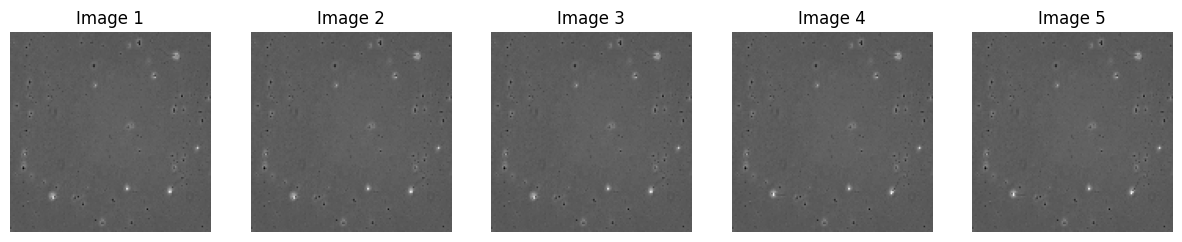

In [5]:
import matplotlib.pyplot as plt

# Function to plot images from the DataFrame
def plot_images_from_df(df, num_images=5):
    """
    Plot a set of images from the DataFrame
    Args:
    - df: DataFrame containing the image data
    - num_images: number of images to display (default is 5)
    """
    # Ensure we don't exceed the number of available images
    num_images = min(num_images, len(df))

    # Set up the plot grid (e.g., for 5 images, a 1x5 grid)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # Loop through and plot the images
    for i, (index, row) in enumerate(df.head(num_images).iterrows()):
        # Get the image from the 'images' column
        image = row['images']

        # Plot the image
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")

    plt.show()

# Example usage
plot_images_from_df(df, num_images=5)

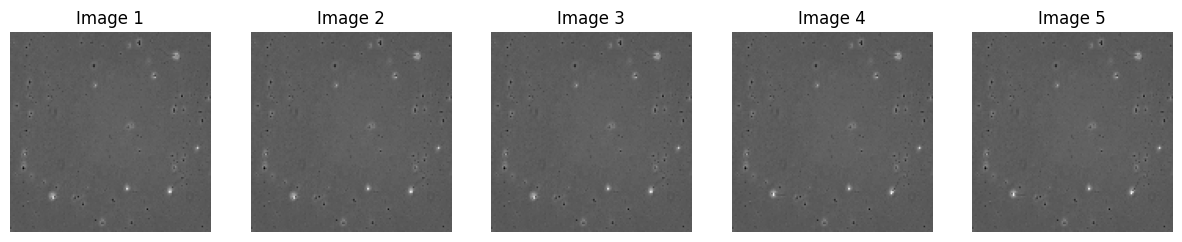

In [6]:
import matplotlib.pyplot as plt

# Function to plot images from the DataFrame
def plot_images_from_df(df, num_images=5):
    """
    Plot a set of images from the DataFrame
    Args:
    - df: DataFrame containing the image data
    - num_images: number of images to display (default is 5)
    """
    # Ensure we don't exceed the number of available images
    num_images = min(num_images, len(df))

    # Set up the plot grid (e.g., for 5 images, a 1x5 grid)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # Loop through and plot the images
    for i, (index, row) in enumerate(df.head(num_images).iterrows()):
        # Get the image from the 'images' column
        image = row['images']

        # Plot the image
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")

    plt.show()

# Example usage
plot_images_from_df(df, num_images=5)

In [7]:
# Original dimensions
original_width = 640
original_height = 480

# New dimensions
new_width = 128
new_height = 128

# Scaling factors
width_scale = new_width / original_width
height_scale = new_height / original_height

# Function to resize YOLO bounding boxes
def resize_bb(row):
    # Scale the bounding box components: [x_center, y_center, width, height]
    x_center_new = row['bb0'] * width_scale
    y_center_new = row['bb1'] * height_scale
    width_new = row['bb2'] * width_scale
    height_new = row['bb3'] * height_scale
    return pd.Series([x_center_new, y_center_new, width_new, height_new])

# Apply the function and create new columns for resized bounding boxes
df[['resized_bb0', 'resized_bb1', 'resized_bb2', 'resized_bb3']] = df.apply(resize_bb, axis=1)

# Display the updated dataframe
df


,Unnamed: 0,frame_name,sperm_count,cluster_count,small_or_pinhead_count,folder,fid,class,bb0,bb1,bb2,bb3,images,resized_bb0,resized_bb1,resized_bb2,resized_bb3
0,0,14_frame_0,3,0,0,14,ckyw6zzlj001r3867thf0fuy7,0,0.208594,0.825000,0.035937,0.037500,"[[0.3843137254901961, 0.37254901960784315, 0.3...",0.041719,0.220000,0.007187,0.010000
1,1,14_frame_0,3,0,0,14,ckyw704kw001v3867kvyjtx6k,0,0.796094,0.797917,0.029687,0.037500,"[[0.3843137254901961, 0.37254901960784315, 0.3...",0.159219,0.212778,0.005938,0.010000
2,2,14_frame_0,3,0,0,14,ckyw708pn001z386779fr849h,0,0.827344,0.123958,0.035937,0.039583,"[[0.3843137254901961, 0.37254901960784315, 0.3...",0.165469,0.033056,0.007187,0.010556
3,3,14_frame_1,3,0,0,14,ckyw6zzlj001r3867thf0fuy7,0,0.208594,0.814583,0.035937,0.037500,"[[0.3843137254901961, 0.37254901960784315, 0.3...",0.041719,0.217222,0.007187,0.010000
4,4,14_frame_1,3,0,0,14,ckyw704kw001v3867kvyjtx6k,0,0.764062,0.781250,0.029687,0.037500,"[[0.3843137254901961, 0.37254901960784315, 0.3...",0.152813,0.208333,0.005938,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19836,19836,52_frame_427,6,0,2,52,cl1x89ze6000o3f6baic4zklo,0,0.464062,0.462500,0.037500,0.054167,"[[0.47058823529411764, 0.4588235294117647, 0.4...",0.092813,0.123333,0.007500,0.014444
19837,19837,52_frame_427,6,0,2,52,cl1x8a7j3000s3f6bvn1rm1tw,0,0.416406,0.400000,0.029687,0.045833,"[[0.47058823529411764, 0.4588235294117647, 0.4...",0.083281,0.106667,0.005938,0.012222
19838,19838,52_frame_427,6,0,2,52,cl1x8ih7n00103f6b67egfbw2,0,0.057031,0.803125,0.032813,0.043750,"[[0.47058823529411764, 0.4588235294117647, 0.4...",0.011406,0.214167,0.006563,0.011667
19839,19839,52_frame_427,6,0,2,52,cl52g254u000o3b6gcyhoi1fk,2,0.132031,0.112500,0.026562,0.037500,"[[0.47058823529411764, 0.4588235294117647, 0.4...",0.026406,0.030000,0.005313,0.010000


# Data Preparation for YOLO-NAS

Data split for train and test

In [8]:
# Install the required library if you haven't
!pip install super-gradients

import os
from super_gradients.training import models
from super_gradients.training import Trainer
from super_gradients.training.datasets.detection_formats import YoloFormatDetectionDataSet
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics
from super_gradients.training.utils.distributed_training_utils import setup_device

# Setup device
device = setup_device()

# Dataset path
dataset_dir = df  # <- Update if your path is different

# Define datasets
train_data = YoloFormatDetectionDataSet(
    dataset_params={
        "data_dir": dataset_dir,
        "images_dir": "images/train",
        "labels_dir": "labels/train",
        "class_names": ["your_class1", "your_class2"],  # <- Update your classes
    },
    dataloader_params={"batch_size": 16, "shuffle": True},
)

val_data = YoloFormatDetectionDataSet(
    dataset_params={
        "data_dir": dataset_dir,
        "images_dir": "images/val",
        "labels_dir": "labels/val",
        "class_names": ["your_class1", "your_class2"],  # <- Update your classes
    },
    dataloader_params={"batch_size": 16, "shuffle": False},
)

# Load YOLO-NAS model
model = models.get(
    model_name="yolo_nas_s",   # Choose yolo_nas_s, yolo_nas_m, or yolo_nas_l
    num_classes=len(["your_class1", "your_class2"]),
    pretrained_weights="coco"  # Start from pretrained COCO weights
)

# Setup Trainer
trainer = Trainer(experiment_name="yolo_nas_experiment", ckpt_root_dir="/content/checkpoints")

# Start training
trainer.train(
    model=model,
    training_params={
        "max_epochs": 30,               # <<<<<< 30 epochs here
        "initial_lr": 5e-4,              # Learning rate
        "loss": PPYoloELoss(num_classes=len(["your_class1", "your_class2"])),
        "optimizer": "AdamW",
        "train_metrics_list": [DetectionMetrics(num_classes=len(["your_class1", "your_class2"]))],
        "valid_metrics_list": [DetectionMetrics(num_classes=len(["your_class1", "your_class2"]))],
        "train_loader": train_data,
        "valid_loader": val_data,
        "mixed_precision": True,         # Faster training with FP16
        "device": device,
        "save_best_checkpoint": True,    # Save best checkpoint automatically
        "save_checkpoint_interval": 5,   # Also save every 5 epochs (optional)
    }
)


In [ ]:
import matplotlib.pyplot as plt
import json
import os

# Path to your experiment logs
experiment_log_dir = "/content/checkpoints/yolo_nas_experiment"

# Training logs are saved automatically by SuperGradients as a JSON file
# We will parse that and plot it

def plot_training_progress(log_dir):
    events_file = os.path.join(log_dir, "experiment_log.json")

    if not os.path.exists(events_file):
        print("No experiment log found!")
        return

    with open(events_file, "r") as f:
        logs = json.load(f)

    # Lists to store values
    epochs = []
    train_losses = []
    val_map_50s = []   # validation mAP@0.5 scores

    for entry in logs:
        if "epoch" in entry:
            epochs.append(entry["epoch"])
            if "train_loss" in entry:
                train_losses.append(entry["train_loss"])
            if "valid_mean_ap_50" in entry:
                val_map_50s.append(entry["valid_mean_ap_50"])

    # Now plot
    plt.figure(figsize=(14,5))

    # Plot training loss
    plt.subplot(1,2,1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.legend()
    plt.grid(True)

    # Plot validation mAP@0.5
    plt.subplot(1,2,2)
    plt.plot(epochs, val_map_50s, label="Validation mAP@0.5", color='orange')
    plt.xlabel("Epoch")
    plt.ylabel("mAP@0.5")
    plt.title("Validation mAP@0.5 Over Epochs")
    plt.legend()
    plt.grid(True)

    plt.show()

# Usage
plot_training_progress(experiment_log_dir)


Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.7 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.6 MB/s eta 0:00:00
